# LIMPIEZA DE DATOS

## 1. El set de datos

La información se encuentra en el archivo CSV (`RStudentsPerformance G5-G6 - StudentsPerformance G5-G6.csv`) con 1000 filas y 8 columnas.

1. "gender": género (categórica: "female", "male")
2. "race/ethnicity": grupo racial o étnico (categórica: "group A", "group B", "group C", "group D", "group E")
3. "parental level of education": nivel educativo de los padres (categórica: "some high school", "high school", "some college", "associate's degree" ,"bachelor's degree", "master's degree")
4. "lunch": tipo de almuerzo (categórica: "standard", "free/reduced")
5. "test preparation course": si completó un curso de preparación para el examen (categórica: "none", "completed")
6. "math score": puntaje en matemáticas (numérica)
7. "reading score": puntaje en lectura (numérica)
8. "writing score": puntaje en escritura (numérica)

# 1. Una primera mirada al dataset

In [15]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('StudentsPerformance G5-G6 - StudentsPerformance G5-G6.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 2. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 2.1 Datos faltantes

Acá comenzamos a viendo si hay datos no completos en las columnas o filas de nuetro data frame.

In [17]:
df.isna().any().any()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 2.2 Columnas irrelevantes 
Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**.
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

In [18]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna gender: 2 subniveles
Columna race/ethnicity: 5 subniveles
Columna parental level of education: 6 subniveles
Columna lunch: 2 subniveles
Columna test preparation course: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## 2.3 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

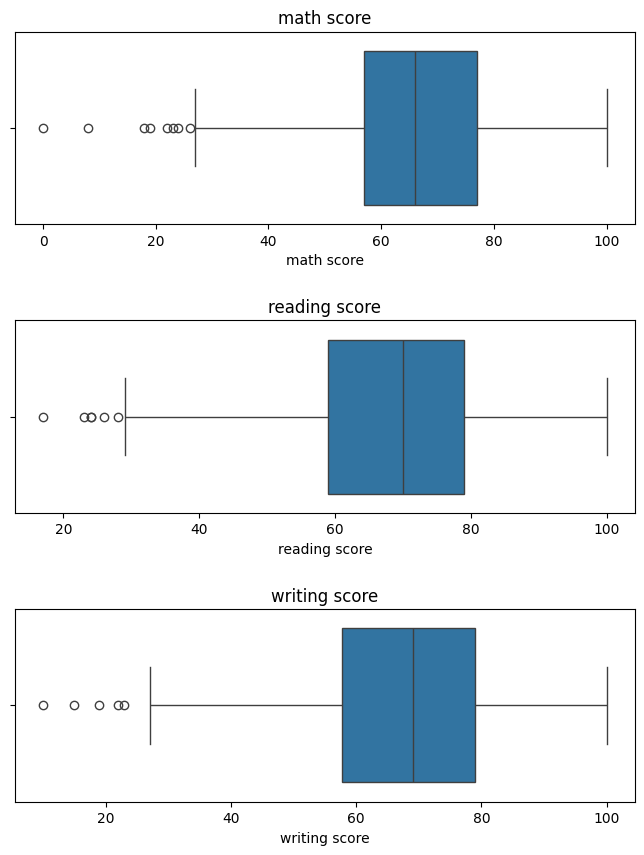

In [20]:
# Generar gráficas individuales pues las variables numéricas
cols_num = ['math score', 'reading score', 'writing score']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- No se identificaron valores atípicos en las variables numéricas.

## 2.4 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "Completed" y "completed" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles.

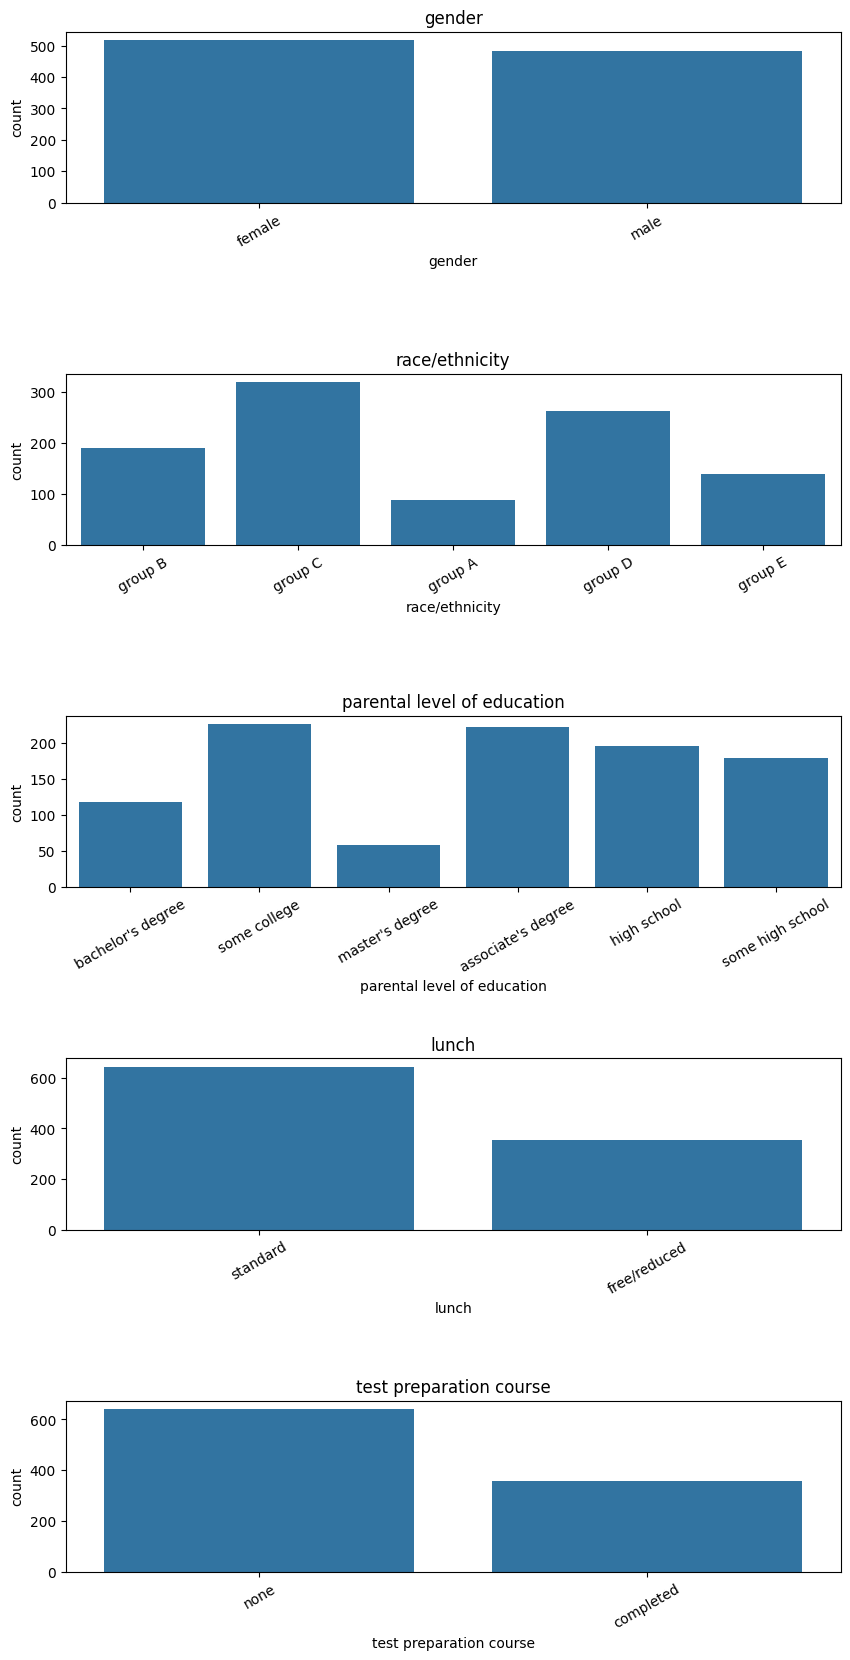

In [21]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)

**Observaciones:**\
- No se observa ningun error tipográfico en las variables categóricas.

## 3. Creación de nuevas variables

Agregaremos a la base de datos dos variables derivadas que pueden enriquecer el análisis al proporcionar nuevas perspectivas o simplificar la interpretación de los datos. Las variables serán:

### 3.1 Promedio

Para resumir el rendimiento académico de un estudiante en una sola métrica.

In [22]:
df['Promedio'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Promedio
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


## 3.2 Notas en letras

Puede facilitar la interpretación de los datos o ser necesaria para análisis categóricos.

In [23]:
def nota_a_letra(nota):
    if nota >= 90:
        return "A"
    elif nota >= 80:
        return "B"
    elif nota >= 70:
        return "C"
    elif nota >= 60:
        return "D"
    else:
        return "F"

df['Nota'] = df['Promedio'].apply(nota_a_letra)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Promedio,Nota
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C
1,female,group C,some college,standard,completed,69,90,88,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,F
4,male,group C,some college,standard,none,76,78,75,76.33,C


## 4. Traducción del dataset

Se tradujo las variables y categorías al español. Esta traducción garantiza una comprensión clara y efectiva de los datos.

In [24]:
# ---- Traducción del DataFrame
df = df.rename(columns={
    'gender': 'Género',
    'race/ethnicity': 'Raza',
    'parental level of education': 'Nivel educativo de los padres',
    'lunch': 'Almuerzo',
    'test preparation course': 'Preparación',
    'math score': 'Nota en matemáticas',
    'reading score': 'Nota en lectura',
    'writing score': 'Nota en escritura'
})


df['Género'] = df['Género'].replace({'female': 'Femenino', 'male': 'Masculino'})
df['Raza'] = df['Raza'].replace({
    'group A': 'Grupo A',
    'group B': 'Grupo B',
    'group C': 'Grupo C',
    'group D': 'Grupo D',
    'group E': 'Grupo E'
})

df['Nivel educativo de los padres'] = df['Nivel educativo de los padres'].replace({
    'associate\'s degree': 'Título de asociado',
    'bachelor\'s degree': 'Licenciatura',
    'high school': 'Escuela secundaria',
    'master\'s degree': 'Título de maestría',
    'some college': 'Algun estudio universitario',
    'some high school': 'Algun estudio de secundaria'
})
df['Almuerzo'] = df['Almuerzo'].replace({'standard': 'Estándar', 'free/reduced': 'Gratis/Reducido'})

df['Preparación'] = df['Preparación'].replace({'completed': 'Completada', 'none': 'Ninguna'})

In [25]:
df.head()

,Género,Raza,Nivel educativo de los padres,Almuerzo,Preparación,Nota en matemáticas,Nota en lectura,Nota en escritura,Promedio,Nota
0,Femenino,Grupo B,Licenciatura,Estándar,Ninguna,72,72,74,72.67,C
1,Femenino,Grupo C,Algun estudio universitario,Estándar,Completada,69,90,88,82.33,B
2,Femenino,Grupo B,Título de maestría,Estándar,Ninguna,90,95,93,92.67,A
3,Masculino,Grupo A,Título de asociado,Gratis/Reducido,Ninguna,47,57,44,49.33,F
4,Masculino,Grupo C,Algun estudio universitario,Estándar,Ninguna,76,78,75,76.33,C


In [26]:
df.to_csv('Rendimiento de los estudiantes de 5to y 6to grado.csv', index=False)